# Zoomcamp MLOps Course Cohort 2024 Week 05 Homework
*Version:* `1.2` *(Jupytext, time measurements, logger, param notebook execution, fixes)*

<a name="ToC"></a>
# Table of Content

- [Notebook Description](#0)
- [General Settings](#1)
    - [Paths](#1-1)
    - [Notebook Functionality and Appearance](#1-2)
    - [External Libraries](#1-3)
    - [Internal Code](#1-4)
    - [Constants](#1-5)   
- [Analysis](#2)   
    - [Data Reading](#2-1)   
    - [Questions](#2-2)
        - [Q1 Prepare the dataset](#2-2-1)     
        - [Q2 Metric](#2-2-2)
        - [Q3 Monitoring](#2-2-3)
        - [Q4 Dashboard](#2-2-4)    
- [Final Timestamp](#3)  

<a name="0"></a>
# Notebook Description
[ToC](#ToC) 

> *Please put your comments about the notebook functionality here.*  

<a name="1"></a>
# GENERAL SETTINGS
[ToC](#ToC)  
General settings for the notebook (paths, python libraries, own code, notebook constants). 

> *NOTE: All imports and constants for the notebook settings shoud be here. Nothing should be imported in the analysis section.*

<a name="1-1"></a>
### Paths
[ToC](#ToC)  

Adding paths that are necessary to import code from within the repository.

In [1]:
import sys
import os
sys.path+=[os.path.join(os.getcwd(), ".."), os.path.join(os.getcwd(), "../..")] # one and two up

<a name="1-2"></a>
### Notebook Functionality and Appearance
[ToC](#ToC)  
Necessary libraries for notebook functionality:
- A button for hiding/showing the code. By default it is deactivated and can be activated by setting CREATE_BUTTON constant to True. 
> **NOTE: This way, using the function, the button works only in active notebook. If the functionality needs to be preserved in html export, then the code has to be incluced directly into notebook.**
- Set notebook width to 100%.
- Notebook data frame setting for better visibility.
- Initial timestamp setting and logging the start of the execution.

#### Overall Setting Specification

In [2]:
LOGGER_CONFIG_NAME = "logger_file_limit_console"
ADDAPT_WIDTH = False

#### Overall Behaviour Setting

In [3]:
try:
    from src.utils.notebook_support_functions import create_button, get_notebook_name
    NOTEBOOK_NAME = get_notebook_name()
    SUPPORT_FUNCTIONS_READ = True
except:
    NOTEBOOK_NAME = "NO_NAME"
    SUPPORT_FUNCTIONS_READ = False  

In [4]:
from src.utils.logger import Logger
from src.utils.envs import Envs
from src.utils.config import Config
from pandas import options
from IPython.display import display, HTML

In [5]:
options.display.max_rows = 500
options.display.max_columns = 500
envs = Envs()
envs.set_logger(LOGGER_CONFIG_NAME)
Logger().start_timer(f"NOTEBOOK; Notebook name: {NOTEBOOK_NAME}")
if ADDAPT_WIDTH:
    display(HTML("<style>.container { width:100% !important; }</style>")) # notebook width

2024-06-21 12:37:45,065 - file_limit_console - INFO - Logger was created on WS-3000 in branche 005_do_week_05_hw.
2024-06-21 12:37:45,067 - file_limit_console - INFO - Process: NOTEBOOK; Notebook name: W05_HW.ipynb; Timer started;


In [6]:
# create_button()

<a name="1-3"></a>
### External Libraries
[ToC](#ToC)  

In [7]:
from datetime import datetime

from datetime import datetime

from os.path import join

import pandas as pd

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from sklearn.metrics import mean_squared_error

from IPython.display import display, HTML

from evidently import ColumnMapping
from evidently.report import Report
from evidently.metrics import ColumnDriftMetric, DatasetDriftMetric, DatasetMissingValuesMetric, ColumnQuantileMetric, DatasetSummaryMetric

<a name="1-4"></a>
### Internal Code
[ToC](#ToC)  
Code, libraries, classes, functions from within the repository.

In [8]:
from src.utils.date_time_functions import create_datetime_id

<a name="1-5"></a>
### Constants
[ToC](#ToC)  
Constants for the notebook.

> *NOTE: Please use all letters upper.*

#### General Constants
[ToC](#ToC)  

In [9]:
# from src.global_constants import *  # Remember to import only the constants in use
N_ROWS_TO_DISPLAY = 2
FIGURE_SIZE_SETTING = {"autosize": False, "width": 2200, "height": 750}
DATA_PROCESSING_CONFIG_NAME = "data_processing_basic"

#### Constants for Setting Automatic Run
[ToC](#ToC)  

In [10]:
# MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION #########################################
PYTHON_CONFIG_NAME = "python_local"
ID = create_datetime_id(now=datetime.now(), add_micro=False)
# (END) MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION ###################################

#### Python Config Initialisation
[ToC](#ToC)  

In [11]:
envs.set_config(PYTHON_CONFIG_NAME)

#### Notebook Specific Constants
[ToC](#ToC)  

<a name="2"></a>
# ANALYSIS
[ToC](#ToC)  

<a name="2-1"></a>
## Chapter
[ToC](#ToC)  

<a name="2-1"></a>
## Data Reading
[ToC](#ToC)  

In [12]:
file_name = "green_tripdata_2024-03.parquet"
df = pd.read_parquet(join(Config().get_data().path.external_data, file_name))

In [13]:
df_processed = df.copy()

<Axes: >

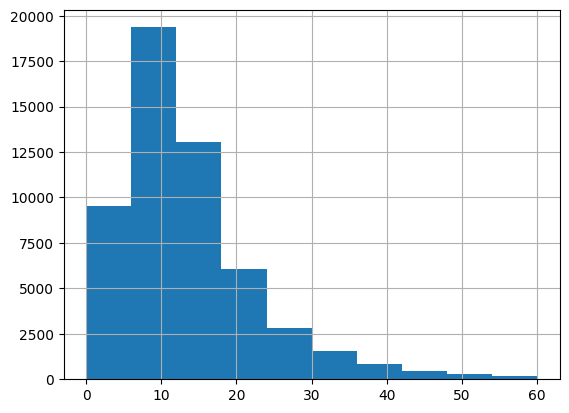

In [14]:
# create target
df_processed["duration_min"] = df_processed.lpep_dropoff_datetime - df_processed.lpep_pickup_datetime
df_processed.duration_min = df_processed.duration_min.apply(lambda td : float(td.total_seconds())/60)

# filter out outliers
df_processed = df_processed[(df_processed.duration_min >= 0) & (df_processed.duration_min <= 60)]
df_processed = df_processed[(df_processed.passenger_count > 0) & (df_processed.passenger_count <= 8)]
df_processed = df_processed.loc[df_processed["lpep_pickup_datetime"] >= datetime(2024, 3, 1, 0, 0, 0),]
df_processed = df_processed.loc[df_processed["lpep_pickup_datetime"] < datetime(2024, 4, 1, 0, 0, 0),]
df_processed.sort_values(by="lpep_pickup_datetime", inplace=True)

df_processed.duration_min.hist()

In [15]:
# data labeling
target = "duration_min"
num_features = ["passenger_count", "trip_distance", "fare_amount", "total_amount"]
cat_features = ["PULocationID", "DOLocationID"]

train_data = df_processed[:30000]
val_data = df_processed[30000:]

model = LinearRegression()

model.fit(train_data[num_features + cat_features], train_data[target])

LinearRegression()

In [16]:
train_preds = model.predict(train_data[num_features + cat_features])
train_data['prediction'] = train_preds

val_preds = model.predict(val_data[num_features + cat_features])
val_data['prediction'] = val_preds

print(mean_absolute_error(train_data.duration_min, train_data.prediction))
print(mean_absolute_error(val_data.duration_min, val_data.prediction))

3.7713926485017137
3.715185458040516


<a name="2-2"></a>
## Questions
[ToC](#ToC)  

<a name="2-2-1"></a>
### Q1 Prepare the dataset
[ToC](#ToC)  

Start with baseline_model_nyc_taxi_data.ipynb. Download the March 2024 Green Taxi data. We will use this data to simulate a production usage of a taxi trip duration prediction service.

What is the shape of the downloaded data? How many rows are there?

72044  
78537  
57457  
54396  

In [17]:
df.shape[0]

57457

In [18]:
answer = f"The number of rows in the data frame is: {df.shape[0]:,d}"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-2"></a>
### Q2 Metric
[ToC](#ToC)  

Let's expand the number of data quality metrics we’d like to monitor! Please add one metric of your choice and a quantile value for the "fare_amount" column (quantile=0.5).

Hint: explore evidently metric ColumnQuantileMetric (from evidently.metrics import ColumnQuantileMetric)

What metric did you choose?

In [19]:
answer = "I chose DatasetSummaryMetric meetric."
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-3"></a>
### Q3 Monitoring
[ToC](#ToC)  

Let’s start monitoring. Run expanded monitoring for a new batch of data (March 2024).

What is the maximum value of metric quantile = 0.5 on the "fare_amount" column during March 2024 (calculated daily)?

10  
12.5  
14.2  
14.8  

In [20]:
df_quant = df_processed.copy()
df_quant["date"] = df_quant["lpep_pickup_datetime"].dt.date
df_pom = df_quant.groupby('date')['fare_amount'].quantile(0.5).reset_index()
print(df_pom.max())
df_pom

date           2024-03-31
fare_amount          14.2
dtype: object


,date,fare_amount
0,2024-03-01,13.500
1,2024-03-02,12.800
2,2024-03-03,14.200
3,2024-03-04,12.800
4,2024-03-05,12.800
5,2024-03-06,12.800
6,2024-03-07,13.500
7,2024-03-08,12.800
8,2024-03-09,13.500
9,2024-03-10,14.200


In [24]:
unique_dates = df_processed["lpep_pickup_datetime"].dt.date.unique()
print(unique_dates)
dfs = []
for date in unique_dates:
    dfs.append(df_processed[df_processed["lpep_pickup_datetime"].dt.date == date])
print(len(dfs))
assert len(unique_dates) == len(dfs)

[datetime.date(2024, 3, 1) datetime.date(2024, 3, 2)
 datetime.date(2024, 3, 3) datetime.date(2024, 3, 4)
 datetime.date(2024, 3, 5) datetime.date(2024, 3, 6)
 datetime.date(2024, 3, 7) datetime.date(2024, 3, 8)
 datetime.date(2024, 3, 9) datetime.date(2024, 3, 10)
 datetime.date(2024, 3, 11) datetime.date(2024, 3, 12)
 datetime.date(2024, 3, 13) datetime.date(2024, 3, 14)
 datetime.date(2024, 3, 15) datetime.date(2024, 3, 16)
 datetime.date(2024, 3, 17) datetime.date(2024, 3, 18)
 datetime.date(2024, 3, 19) datetime.date(2024, 3, 20)
 datetime.date(2024, 3, 21) datetime.date(2024, 3, 22)
 datetime.date(2024, 3, 23) datetime.date(2024, 3, 24)
 datetime.date(2024, 3, 25) datetime.date(2024, 3, 26)
 datetime.date(2024, 3, 27) datetime.date(2024, 3, 28)
 datetime.date(2024, 3, 29) datetime.date(2024, 3, 30)
 datetime.date(2024, 3, 31)]
31


In [ ]:
column_mapping = ColumnMapping(
    target=None,
    prediction='prediction',
    numerical_features=num_features,
    categorical_features=cat_features
)

In [ ]:
report = Report(metrics=[
    ColumnDriftMetric(column_name='prediction'),
    ColumnQuantileMetric(column_name="fare_amount", quantile=0.5),
    DatasetDriftMetric(),
    DatasetMissingValuesMetric(),
    DatasetSummaryMetric()
])

In [ ]:
report.run(reference_data=train_data, current_data=val_data, column_mapping=column_mapping)
report.show(mode='inline')

<a name="2-2-4"></a>
### Q4 Dashboard
[ToC](#ToC)  

Finally, let’s add panels with new added metrics to the dashboard. After we customize the dashboard let's save a dashboard config, so that we can access it later. Hint: click on “Save dashboard” to access JSON configuration of the dashboard. This configuration should be saved locally.

Where to place a dashboard config file?

project_folder (05-monitoring)  
project_folder/config (05-monitoring/config)  
project_folder/dashboards (05-monitoring/dashboards)  
project_folder/data (05-monitoring/data)  

<a name="3"></a>
# Final Timestamp
[ToC](#ToC)  

In [ ]:
Logger().end_timer()